#### Importing packages

In [1]:
import os

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers,Model 
from tensorflow.keras.datasets import mnist 
from tensorflow import keras 
from tensorflow.keras.utils import plot_model


# Subclassing

Model subclassing--> Both the sequential model and functional API of Keras are useful for building models that are straightforward but they cannot be customized beyond one extent. To overcome this shortcoming Keras provides a more flexible option of Model SubClassing to build fully-customizable models. This is useful when you are researching new types of architecture from scratch.


### Implementing custom layers:
The best way to implement your own layer is extending the tf.keras.Layer class and implementing:

* __init__ , where you can do all input-independent initialization. 
> The __init__ method is similar to constructors in C++ and Java. Constructors are used to initialize the object’s state. The task of constructors is to initialize(assign values) to the data members of the class when an object of class is created. The method is useful to do any initialization you want to do with your object.
* self, The keyword self represents the instance of a class and binds the attributes with the given arguments.
> The reason you need to use self. is because Python does not use the @ syntax to refer to instance attributes. self is parameter in function and user can use another parameter name in place of it.But it is advisable to use self because it increase the readability of code.
* super(), It returns a proxy/temporary object that allows us to access methods of the base class.
* call, where you do the forward computation

Creating variables in __init__ would mean that shapes required to create the variables will need to be explicitly specified.

In [2]:
class car(): 
    # blueprint for car

    def __init__(self, model, color): 
        self.model = model 
        self.color = color 
          
    def show(self): 
        print("The model name is", self.model ) 
        print("The color is", self.color ) 

In [3]:
audi = car("audi r8", "red") 
ford = car("mustang gt", "black") 

In [4]:
audi.model

'audi r8'

In [5]:
audi.show()     
ford.show()  

The model name is audi r8
The color is red
The model name is mustang gt
The color is black


In [6]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

class Square:
    def __init__(self, length):
        self.length = length

    def area(self):
        return self.length * self.length


In [7]:
square = Square(4)
square.area()

16

In [8]:
rectangle = Rectangle(2,4)
rectangle.area()

8

> By using inheritance, you can reduce the amount of code you write while simultaneously reflecting the real-world relationship between rectangles and squares:

Here, you’ve used super() to call the __init__() of the Rectangle class, allowing you to use it in the Square class without repeating code. Below, the core functionality remains after making changes:

In [9]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

In [10]:
square = Square(4)
square.area()

16

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0



> The __call__ method inside Model infact comes from keras.engine.layer._Layer class. It is inherited by Model class.

> We want to override the inherited call method, with the new __call__ method.

> That is why we don't need to do a model.call(). So when we call our model instance, it's inherited __call__ method will be executed automatically, which calls our own call method.







In [12]:
class MyModel(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super().__init__()
        self.dense1 = layers.Dense(64)
        self.dense2 = layers.Dense(num_classes)

    def call(self, x):
        x = tf.nn.relu(self.dense1(x))
        return self.dense2(x)

    def model(self):
      x=keras.Input(shape=(28*28))
      return Model(inputs=[x],outputs=self.call(x))

In [13]:
sub_model = MyModel()

In [14]:
sub_model.model().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
sub_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"])


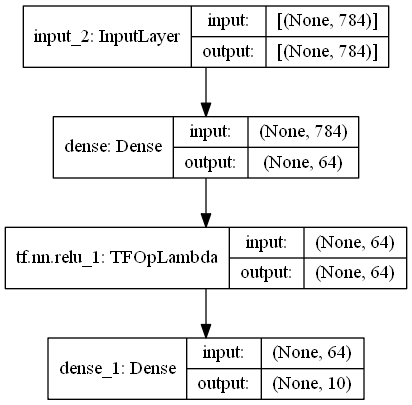

In [16]:
plot_model(sub_model.model(), to_file='sub_model.png',show_shapes=True)

In [17]:
sub_model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=1)

sub_model.evaluate(x_test,y_test,batch_size=32,verbose=1)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4976 - accuracy: 0.8606
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1576 - accuracy: 0.9547
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1069 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9754
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9714


[0.0892474576830864, 0.9714000225067139]

### Building Dense layers



*   One of the central abstraction in Keras is the Layer class. A layer encapsulates both a state (the layer's "weights") and a transformation from inputs to outputs (a "call", the layer's forward pass).

Here's a densely-connected layer. It has a state: the variables w and b.




In [18]:
class custom_dense(keras.layers.Layer):
    def __init__(self, units, input_dim):
        super().__init__()
        self.w = self.add_weight(
            name="w",
            shape=(input_dim, units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(units,), initializer="zeros", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [19]:
class MyReLU(keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def call(self, x):
        return tf.math.maximum(x, 0)

In [20]:
class MyModel(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super().__init__()
        self.dense1 = custom_dense(64,784)
        self.dense2 = custom_dense(num_classes,64)
        self.relu = MyReLU()

    def call(self, x):
        x = self.relu(self.dense1(x))
        return self.dense2(x)
    
    def model(self):
        x = keras.Input(shape=(28*28))
        return Model(inputs=[x],outputs=self.call(x))

In [21]:
fin_model = MyModel()

fin_model.model().summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
custom_dense (custom_dense)  (None, 64)                50240     
_________________________________________________________________
my_re_lu (MyReLU)            (None, 64)                0         
_________________________________________________________________
custom_dense_1 (custom_dense (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
fin_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

fin_model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1)
fin_model.evaluate(x_test, y_test, batch_size=64, verbose=1)


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.7258 - accuracy: 0.8127
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2066 - accuracy: 0.9426
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1521 - accuracy: 0.9568
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1197 - accuracy: 0.9655
Epoch 5/5
157/157 [==============================] - 1s 3ms/step - loss: 0.1013 - accuracy: 0.9697


[0.10126744210720062, 0.9696999788284302]

### Building Tf Datasets

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train=tf.expand_dims(x_train, -1)
x_test=tf.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Under the hood,using the naive approach, this is how your execution time was spent:
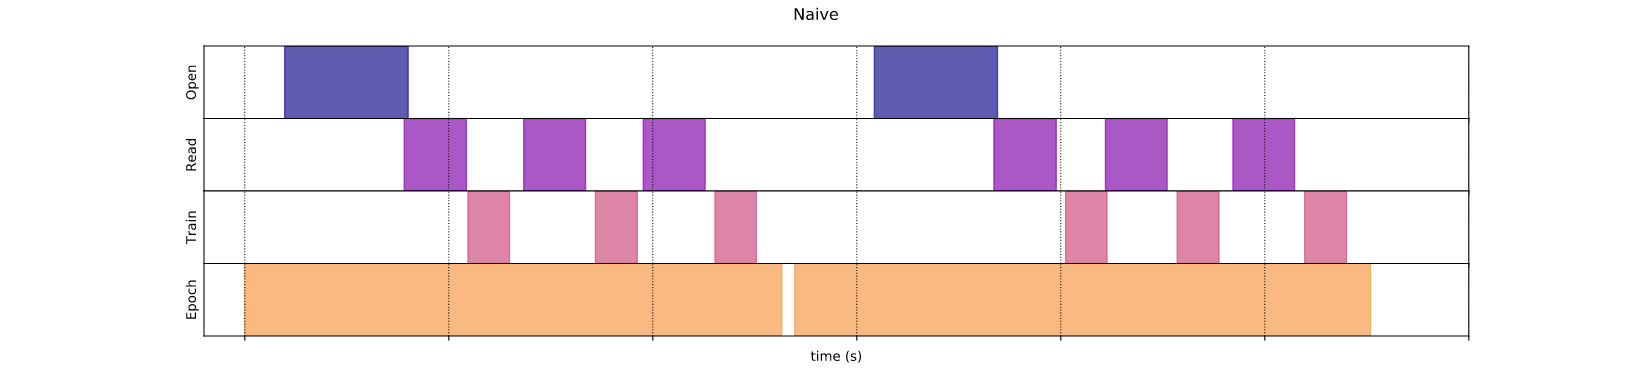

in a naive synchronous implementation like here, while your pipeline is fetching the data, your model is sitting idle. Conversely, while your model is training, the input pipeline is sitting idle. The training step time is thus the sum of opening, reading and training times.

* The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed.'
* The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. 
* You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.
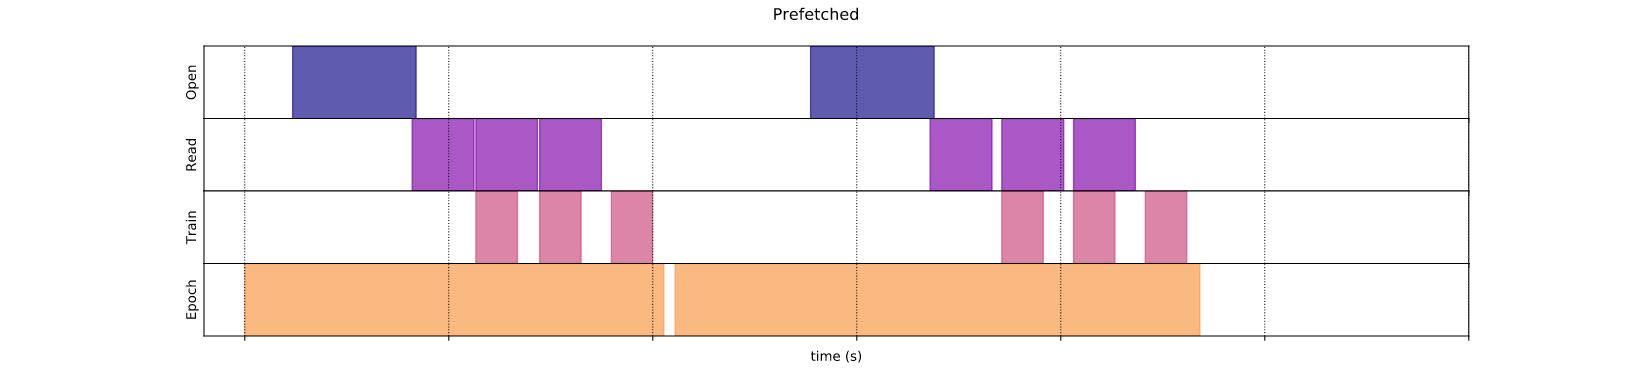

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=len(y_train)).batch(32,drop_remainder=True).prefetch(buffer_size=AUTOTUNE))

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (test_dataset.batch(32,drop_remainder=False).prefetch(buffer_size=AUTOTUNE))

In [25]:
print(train_dataset)
print(test_dataset)

<PrefetchDataset shapes: ((32, 28, 28, 1), (32,)), types: (tf.float32, tf.uint8)>
<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>


In [26]:
class custom_CNN(keras.layers.Layer):
    def __init__(self, filters, kernel_size=3):
        super().__init__()
        self.conv = layers.Conv2D(filters, kernel_size, padding="same")
        self.bn = layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv(input_tensor)
        x = self.bn(x, training=training)
        x = tf.nn.relu(x)
        return x
    
    def model(self):
        x = keras.Input()
        return keras.Model(inputs=[x], outputs=self.call(x))


In [27]:
cus_model = keras.Sequential(
    [keras.Input(shape=(28, 28, 1)),
     custom_CNN(32), 
     custom_CNN(64), 
     custom_CNN(128), 
     layers.Flatten(), 
     layers.Dense(10),]
)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_cnn (custom_CNN)      (None, 28, 28, 32)        448       
_________________________________________________________________
custom_cnn_1 (custom_CNN)    (None, 28, 28, 64)        18752     
_________________________________________________________________
custom_cnn_2 (custom_CNN)    (None, 28, 28, 128)       74368     
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1003530   
Total params: 1,097,098
Trainable params: 1,096,650
Non-trainable params: 448
_________________________________________________________________
None


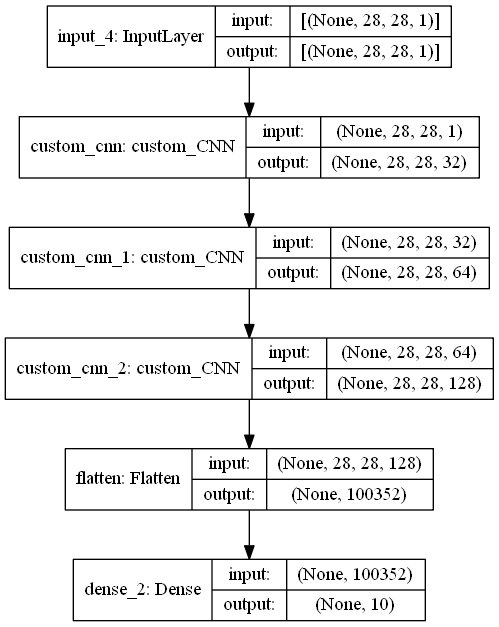

In [28]:
print(cus_model.summary())

plot_model(cus_model, to_file='cus_model.png',show_shapes=True)

You can pass a Dataset instance directly to the methods fit(), evaluate(), and predict():

In [29]:
cus_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

cus_model.fit(train_dataset, batch_size=32, epochs=5, verbose=1)
cus_model.evaluate(test_dataset, batch_size=32, verbose=1)


Epoch 1/5
1875/1875 [==============================] - 38s 7ms/step - loss: 1.4836 - accuracy: 0.9019
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0453 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0329 - accuracy: 0.9898
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0429 - accuracy: 0.9885


[0.04287509620189667, 0.9884999990463257]

### Backward propogation


#### Gradient Tape

tf.GradientTape --> Record operations for automatic differentiation.

In [30]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)


tf.Tensor(6.0, shape=(), dtype=float32)


> To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.


* With eager execution enabled, Tensorflow will calculate the values of tensors as they occur in your code. 
* This means that it won't precompute a static graph for which inputs are fed in through placeholders. 
* This means to back propagate errors, you have to keep track of the gradients of your computation and then apply these gradients to an optimiser.

* If you have a custom layer, you can define exactly how the operations occur within that layer, including the gradients that are computed and also calculating the amount of loss that is accumulated.

* So Gradient tape will just give you direct access to the individual gradients that are in the layer.

> Once you've recorded some operations, use GradientTape.gradient(target, sources) to calculate the gradient of some target (often a loss) relative to some source (often the model's variables)

In [31]:
 def f(w1, w2):
     return 3 * w1 ** 2 + 2 * w1 * w2

In [32]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [33]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [34]:
cus_model = keras.Sequential(
    [keras.Input(shape=(28, 28, 1)),
     custom_CNN(32), 
     custom_CNN(64), 
     custom_CNN(128), 
     layers.Flatten(), 
     layers.Dense(10),]
)

In [35]:
class Custom_fit(keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def compile(self, optimizer, loss, metric):
    super(Custom_fit, self).compile()
    self.optimizer = optimizer
    self.loss = loss
    self.metric = metric

  def train_step(self,data):
    # Unpack the data
    x, y = data
    with tf.GradientTape() as tape:
      # Compute predictions
      y_pred = self.model(x, training=True)
      # Calculating loss
      loss = self.loss(y, y_pred)
    
    # Tracking gradients
    training_vars = self.trainable_variables
    gradients = tape.gradient(loss, training_vars)

    #Update optimizer & metrics
    self.optimizer.apply_gradients(zip(gradients, training_vars))
    self.metric.update_state(y, y_pred)

    return {"Train_loss for Custom_train": loss, "Train_accuracy for Custom_train": self.metric.result()}


  def test_step(self, data):
    # Unpack the data
    x, y = data
    # Compute predictions
    y_pred = self.model(x, training=False)
    # Calculating loss
    loss = self.loss(y, y_pred)
    #Update optimizer & metrics
    self.metric.update_state(y, y_pred)
    return {"Test_loss for Custom_test": loss, "Test_accuracy for Custom_test": self.metric.result()}



In [36]:
cus_train = Custom_fit(cus_model)
cus_train.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metric = keras.metrics.SparseCategoricalAccuracy(name="accuracy")
)

cus_train.fit(train_dataset,batch_size=32, epochs=5)
cus_train.evaluate(test_dataset, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - Train_loss for Custom_train: 0.2858 - Train_accuracy for Custom_train: 0.9095
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - Train_loss for Custom_train: 0.1160 - Train_accuracy for Custom_train: 0.9779
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - Train_loss for Custom_train: 0.0580 - Train_accuracy for Custom_train: 0.9873
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - Train_loss for Custom_train: 0.0367 - Train_accuracy for Custom_train: 0.9899
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - Test_loss for Custom_test: 0.0505 - Test_accuracy for Custom_test: 0.9827


[0.9865999817848206, 9.618052899895702e-06]